<a href="https://colab.research.google.com/github/abhicsng007/TSF-Internship/blob/master/TSF-QUE4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Analysis of Super store  Data**

In [ ]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


**Reading the Data**

In [ ]:
data = pd.read_csv("/content/drive/My Drive/SampleSuperstore.csv")
data

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,25.2480,3,0.20,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,91.9600,2,0.00,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,258.5760,2,0.20,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,29.6000,4,0.00,13.3200


**Knowing the Data**

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [ ]:
data.shape

(9994, 13)

In [ ]:
#Columns that take numerical values
numerical = ['Sales','Quantity','Discount','Profit']


**Looking for distribution of values**

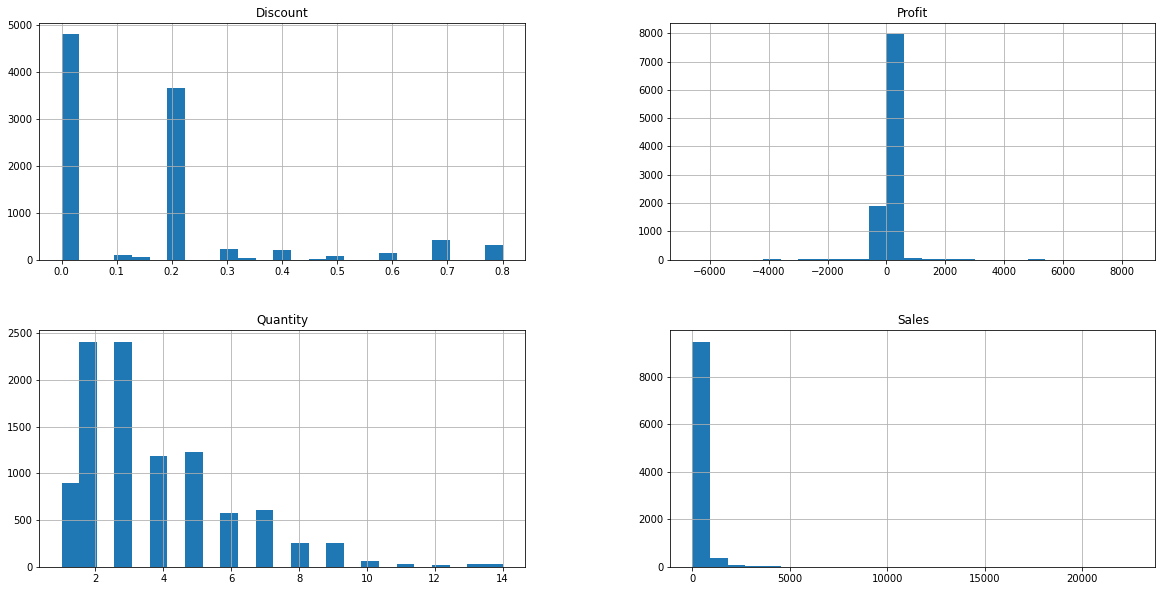

In [ ]:
data[numerical].hist(bins=25, figsize=(20,10), layout=(2, 2));

**Visualizing Categorical Columns**

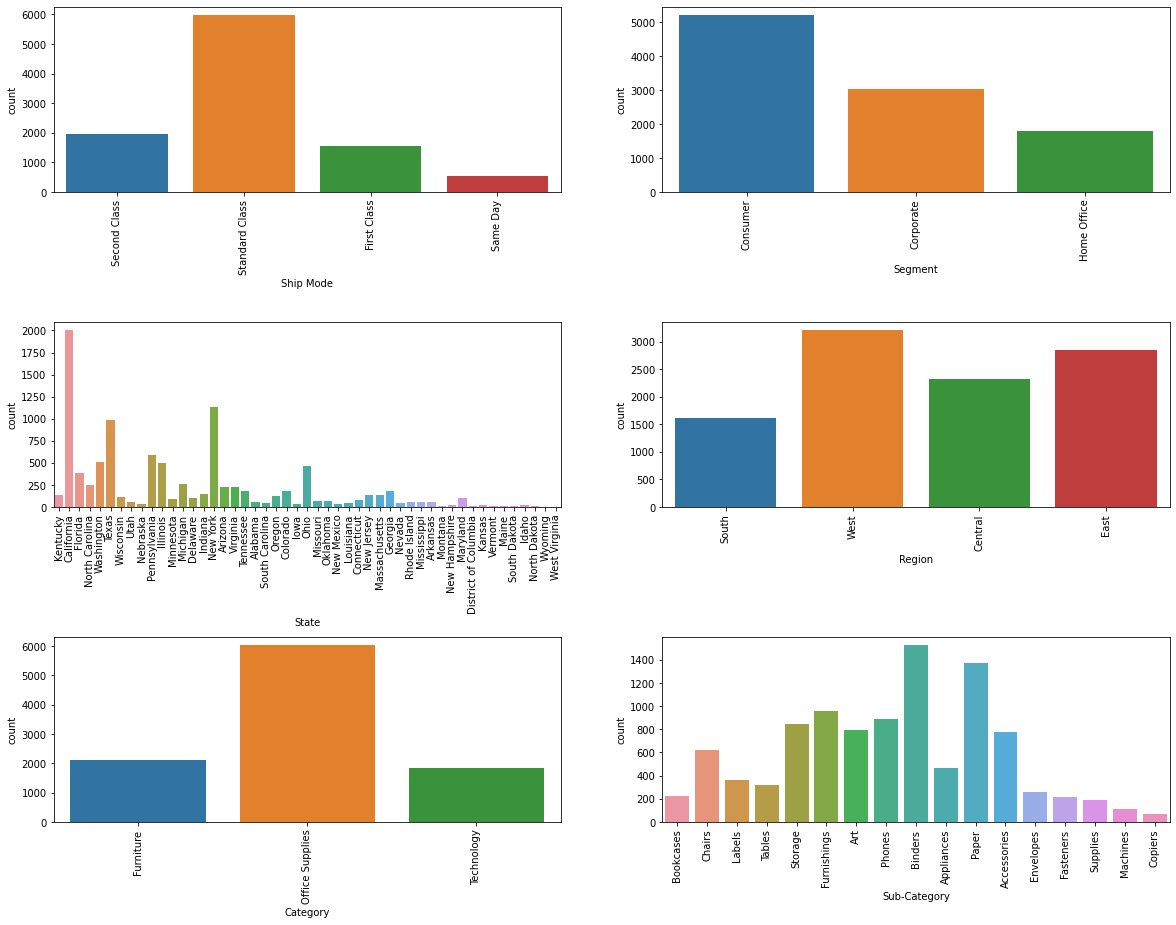

In [ ]:
categorical = ['Ship Mode','Segment','State','Region','Category','Sub-Category']
fig, ax = plt.subplots(3, 2, figsize=(20, 15))

plt.subplots_adjust(hspace=0.7)
for variable, subplot in zip(categorical, ax.flatten()):
    sns.countplot(data[variable], ax=subplot)
    for label in subplot.get_xticklabels():
        label.set_rotation(90)

**Finding Correlation between the numerical columns**

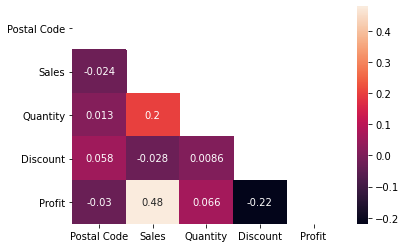

In [ ]:
matrix = np.triu(data.corr())
sns.heatmap(data.corr(), annot=True, mask=matrix)

there is strong positive correlation between sales price and profit and negative correlation between discount and sales price

**Finding Pearson Coefficient between numerical data**

In [ ]:
from scipy import stats
pearson_coef, p_value = stats.pearsonr(data['Sales'], data['Profit'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)

The Pearson Correlation Coefficient is 0.4790643497377061  with a P-value of P = 0.0


In [ ]:
pearson_coef, p_value = stats.pearsonr(data['Discount'], data['Profit'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)

The Pearson Correlation Coefficient is -0.21948745637176847  with a P-value of P = 2.702294436219114e-109


In [ ]:
pearson_coef, p_value = stats.pearsonr(data['Quantity'], data['Profit'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)

The Pearson Correlation Coefficient is 0.06625318912428485  with a P-value of P = 3.361709415923692e-11


the values of p describes these three are important factors for determining profit

**Visualizing the distribution of categorical data through box plots**

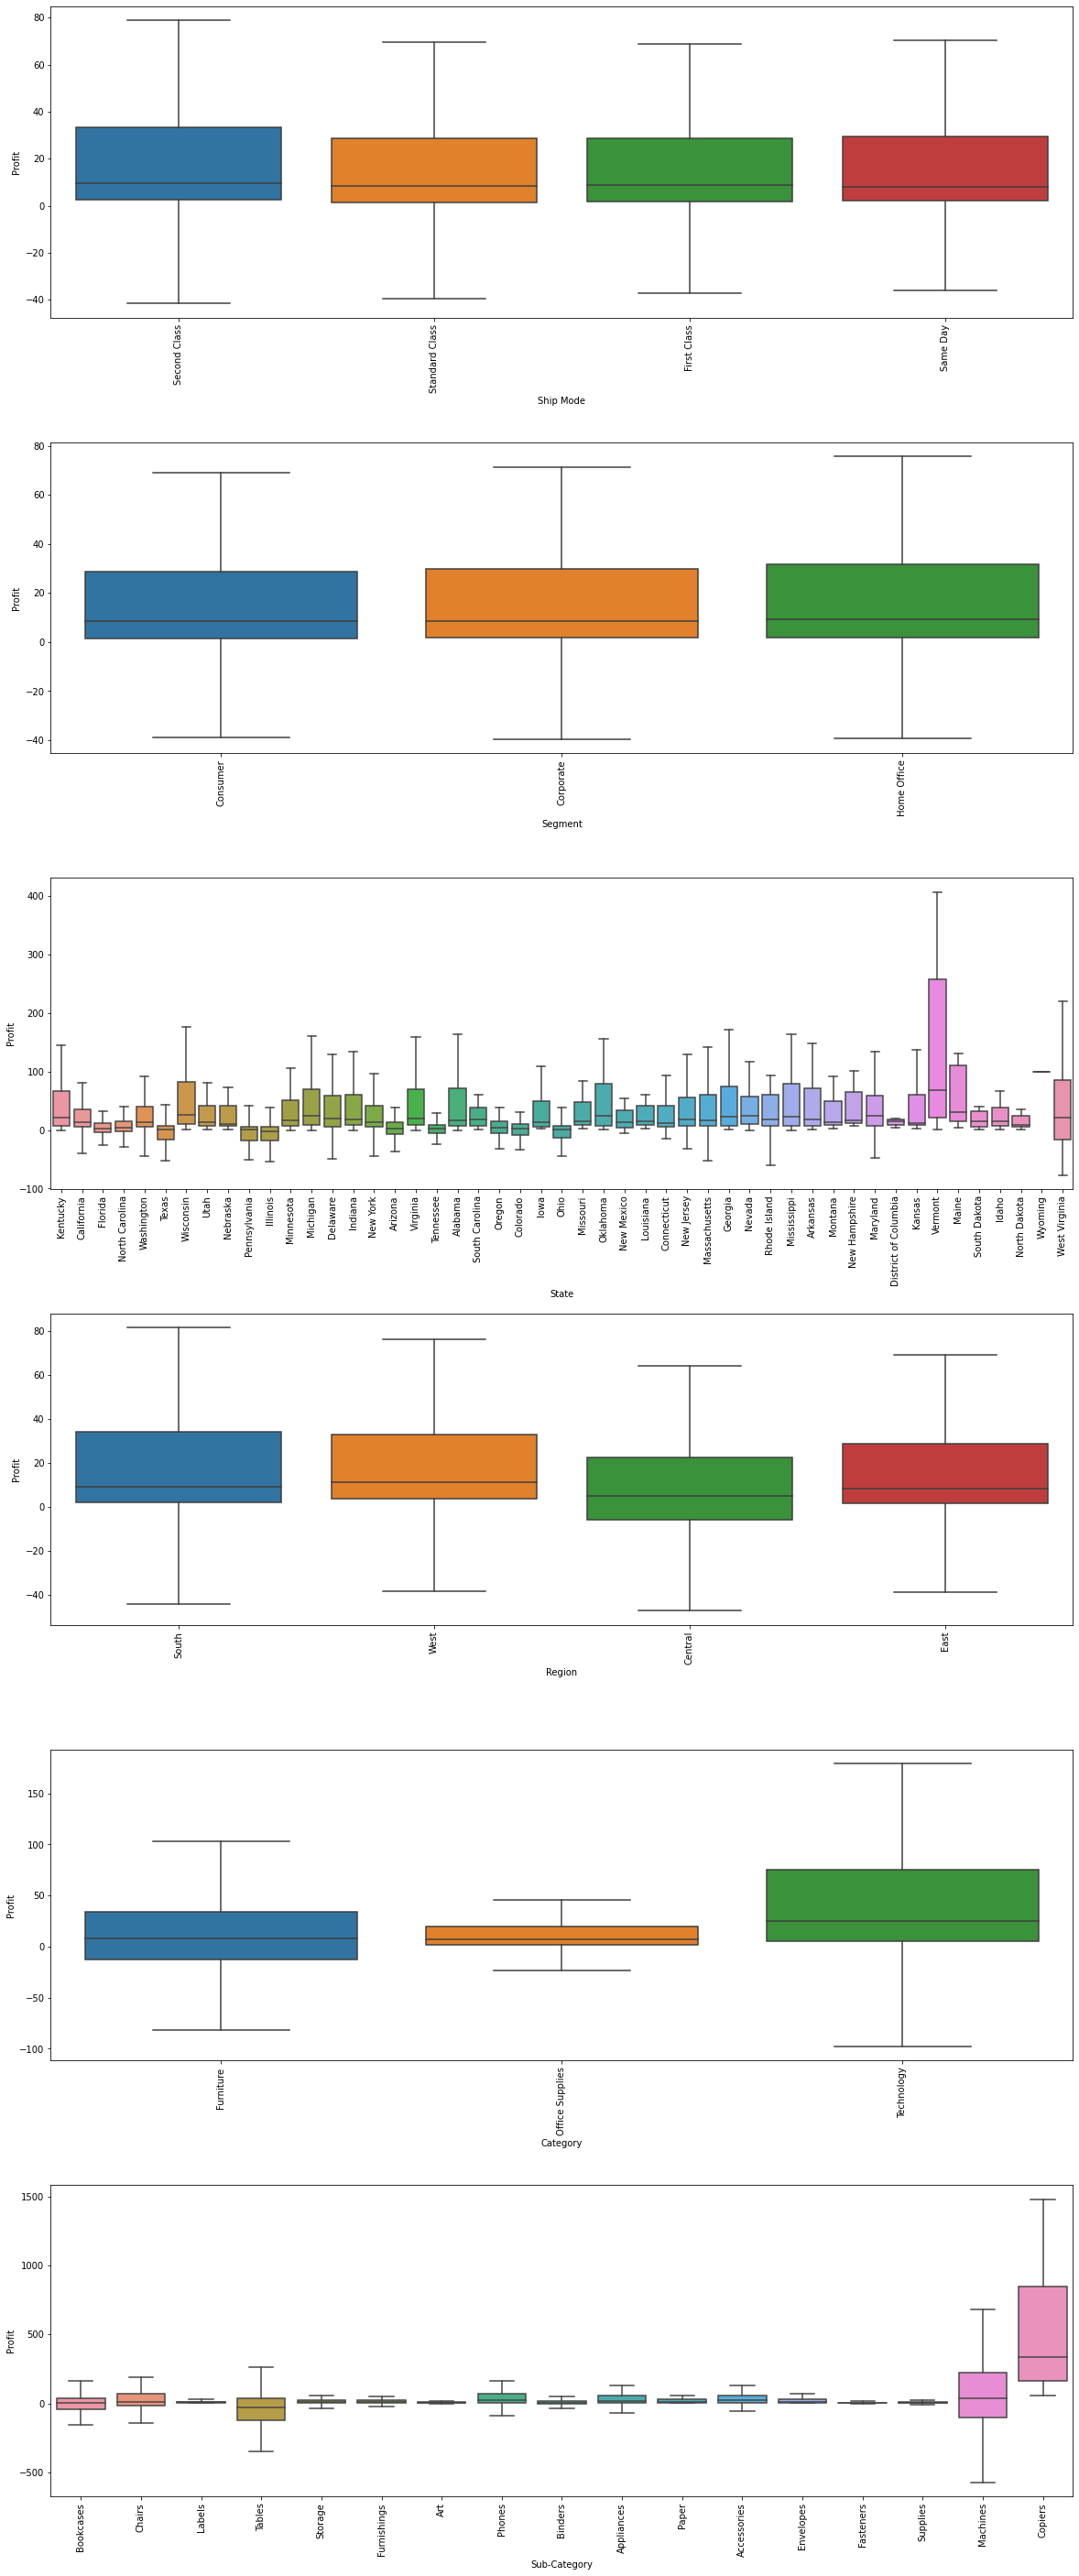

In [ ]:
fig, ax = plt.subplots(6, 1, figsize=(20,50))
plt.subplots_adjust(hspace=0.4)
for var, subplot in zip(categorical, ax.flatten()):
    sns.boxplot(x=var, y= 'Profit', data=data, ax=subplot,showfliers=False)
    for label in subplot.get_xticklabels():
        label.set_rotation(90)

Important factors are Ship Mode,segment,category,subcategory

**Grouping the data**

In [ ]:
#finding cost of single item
cost = data['Sales']/data['Quantity']

#finding profit per sold items

data['Profit'] = data['Profit']/data['Quantity']

#Grouping Data
data_group_one = data[['Ship Mode','Segment','Category','Sub-Category','Cost','Discount','Profit']]
data_group_one = data_group_one.groupby(['Ship Mode','Segment','Category','Sub-Category'],as_index=False).mean()

#Data for first Class & consumer
data_group_1 = data_group_one[data_group_one['Ship Mode'] == 'First Class']
data_group_1 = data_group_1[data_group_1['Segment'] == 'Consumer']

#Data for Same Day & consumer
data_group_2 = data_group_one[data_group_one['Ship Mode'] == 'Same Day']
data_group_2 = data_group_2[data_group_2['Segment'] == 'Consumer']

#Data for Second Class & consumer
data_group_3 = data_group_one[data_group_one['Ship Mode'] == 'Second Class' ]
data_group_3 = data_group_3[data_group_3['Segment'] == 'Consumer']

#Data for Standard Class & consumer
data_group_4 = data_group_one[data_group_one['Ship Mode'] == 'Standard Class']
data_group_4 = data_group_4[data_group_4['Segment'] == 'Consumer']

#Data for first Class & Corporate
data_group_11 = data_group_one[data_group_one['Ship Mode'] == 'First Class']
data_group_11 = data_group_11[data_group_11['Segment'] == 'Coporate']

#Data for Same Day & corporate
data_group_22 = data_group_one[data_group_one['Ship Mode'] == 'Same Day' ]
data_group_22 = data_group_22[data_group_22['Segment'] == 'Coporate']

#Data for Second Class & corporate
data_group_33 = data_group_one[data_group_one['Ship Mode'] == 'Second Class' ]
data_group_33 = data_group_33[data_group_33['Segment'] == 'Coporate']

#Data for Standard Class & corporate
data_group_44 = data_group_one[data_group_one['Ship Mode'] == 'Standard Class']
data_group_44 = data_group_44[data_group_44['Segment'] == 'Coporate']

#Data for First Class & Home Office
data_group_111 = data_group_one[data_group_one['Ship Mode'] == 'First Class']
data_group_111 = data_group_111[data_group_111['Segment'] == 'Home Office']

#Data for Same Day & Home Office
data_group_222 = data_group_one[data_group_one['Ship Mode'] == 'Same Day']
data_group_222 = data_group_222[data_group_222['Segment'] == 'Home Office']

#Data for Second Class & Home Office
data_group_333 = data_group_one[data_group_one['Ship Mode'] == 'Second Class']
data_group_333 = data_group_333[data_group_333['Segment'] == 'Home Office']

#Data for Standard Class & Home Office
data_group_444 = data_group_one[data_group_one['Ship Mode'] == 'Standard Class']
data_group_444 = data_group_444[data_group_444['Segment'] == 'Home Office']


**Looking out data for each grouped data**

In [ ]:
data_group_1

,Ship Mode,Segment,Category,Sub-Category,Cost,Discount,Profit
0,First Class,Consumer,Furniture,Bookcases,112.006431,0.219615,-3.730315
1,First Class,Consumer,Furniture,Chairs,143.274805,0.182927,6.655200
2,First Class,Consumer,Furniture,Furnishings,30.094775,0.125000,4.873847
3,First Class,Consumer,Furniture,Tables,158.668647,0.270588,-11.704588
4,First Class,Consumer,Office Supplies,Appliances,57.390222,0.106667,13.650020
5,First Class,Consumer,Office Supplies,Art,8.708590,0.088525,2.066900
6,First Class,Consumer,Office Supplies,Binders,47.134345,0.400000,7.733378
7,First Class,Consumer,Office Supplies,Envelopes,30.631500,0.100000,13.355225
8,First Class,Consumer,Office Supplies,Fasteners,3.217250,0.037500,1.145331
9,First Class,Consumer,Office Supplies,Labels,8.441000,0.093750,3.836563


In [ ]:
data_group_2

,Ship Mode,Segment,Category,Sub-Category,Cost,Discount,Profit
51,Same Day,Consumer,Furniture,Bookcases,281.308500,0.175000,12.584300
52,Same Day,Consumer,Furniture,Chairs,136.012050,0.150000,6.294550
53,Same Day,Consumer,Furniture,Furnishings,29.608125,0.231250,1.014825
54,Same Day,Consumer,Furniture,Tables,131.065667,0.275000,-13.217000
55,Same Day,Consumer,Office Supplies,Appliances,96.591667,0.158333,23.971658
56,Same Day,Consumer,Office Supplies,Art,10.207000,0.083333,2.496779
57,Same Day,Consumer,Office Supplies,Binders,21.718932,0.363636,5.481839
58,Same Day,Consumer,Office Supplies,Envelopes,11.188000,0.100000,4.745575
59,Same Day,Consumer,Office Supplies,Fasteners,2.849800,0.040000,1.118970
60,Same Day,Consumer,Office Supplies,Labels,9.639833,0.050000,3.868800


In [ ]:
data_group_3

,Ship Mode,Segment,Category,Sub-Category,Cost,Discount,Profit
102,Second Class,Consumer,Furniture,Bookcases,135.215841,0.230000,-8.362722
103,Second Class,Consumer,Furniture,Chairs,141.400863,0.158904,11.222537
104,Second Class,Consumer,Furniture,Furnishings,22.225535,0.143434,3.352032
105,Second Class,Consumer,Furniture,Tables,159.985527,0.252703,-17.055973
106,Second Class,Consumer,Office Supplies,Appliances,68.753744,0.194872,5.101446
107,Second Class,Consumer,Office Supplies,Art,9.347057,0.066667,2.388208
108,Second Class,Consumer,Office Supplies,Binders,32.955007,0.317391,7.704775
109,Second Class,Consumer,Office Supplies,Envelopes,12.192769,0.092308,5.259769
110,Second Class,Consumer,Office Supplies,Fasteners,3.482947,0.073684,1.359389
111,Second Class,Consumer,Office Supplies,Labels,10.512875,0.043750,4.654547


In [ ]:
data_group_4

,Ship Mode,Segment,Category,Sub-Category,Cost,Discount,Profit
153,Standard Class,Consumer,Furniture,Bookcases,137.662188,0.220263,-9.880489
154,Standard Class,Consumer,Furniture,Chairs,133.059779,0.174872,10.041751
155,Standard Class,Consumer,Furniture,Furnishings,27.188042,0.132862,4.304941
156,Standard Class,Consumer,Furniture,Tables,166.681376,0.269355,-19.046022
157,Standard Class,Consumer,Office Supplies,Appliances,52.644689,0.202027,4.704190
158,Standard Class,Consumer,Office Supplies,Art,8.662656,0.080469,2.019829
159,Standard Class,Consumer,Office Supplies,Binders,40.660662,0.390397,7.690025
160,Standard Class,Consumer,Office Supplies,Envelopes,20.354024,0.081928,8.612919
161,Standard Class,Consumer,Office Supplies,Fasteners,3.558928,0.075362,1.177009
162,Standard Class,Consumer,Office Supplies,Labels,8.271805,0.049558,3.834424


In [ ]:
data_group_11

,Ship Mode,Segment,Category,Sub-Category,Cost,Discount,Profit


In [ ]:
data_group_22

,Ship Mode,Segment,Category,Sub-Category,Cost,Discount,Profit


In [ ]:
data_group_33

,Ship Mode,Segment,Category,Sub-Category,Cost,Discount,Profit


In [ ]:
data_group_44

,Ship Mode,Segment,Category,Sub-Category,Cost,Discount,Profit


In [ ]:
data_group_111

,Ship Mode,Segment,Category,Sub-Category,Cost,Discount,Profit
34,First Class,Home Office,Furniture,Bookcases,227.121829,0.234286,8.896086
35,First Class,Home Office,Furniture,Chairs,130.256471,0.147059,14.127618
36,First Class,Home Office,Furniture,Furnishings,16.450667,0.142857,1.617786
37,First Class,Home Office,Furniture,Tables,176.824143,0.257143,-10.889686
38,First Class,Home Office,Office Supplies,Appliances,132.673000,0.125000,30.101300
39,First Class,Home Office,Office Supplies,Art,9.039040,0.096000,1.896408
40,First Class,Home Office,Office Supplies,Binders,65.208043,0.389362,17.631702
41,First Class,Home Office,Office Supplies,Envelopes,21.329500,0.125000,7.552912
42,First Class,Home Office,Office Supplies,Fasteners,2.987500,0.150000,0.786150
43,First Class,Home Office,Office Supplies,Labels,8.113091,0.090909,3.382800


In [ ]:
data_group_222

,Ship Mode,Segment,Category,Sub-Category,Cost,Discount,Profit
85,Same Day,Home Office,Furniture,Bookcases,99.860000,0.125000,9.656300
86,Same Day,Home Office,Furniture,Chairs,112.912444,0.233333,-0.832322
87,Same Day,Home Office,Furniture,Furnishings,21.618889,0.066667,4.033433
88,Same Day,Home Office,Furniture,Tables,153.626000,0.266667,-13.842900
89,Same Day,Home Office,Office Supplies,Appliances,77.886000,0.333333,-0.688867
90,Same Day,Home Office,Office Supplies,Art,6.269667,0.100000,0.923233
91,Same Day,Home Office,Office Supplies,Binders,5.285143,0.371429,0.882921
92,Same Day,Home Office,Office Supplies,Envelopes,27.587500,0.000000,13.097975
93,Same Day,Home Office,Office Supplies,Fasteners,1.890000,0.000000,0.037800
94,Same Day,Home Office,Office Supplies,Labels,11.067000,0.033333,5.136283


In [ ]:
data_group_333

,Ship Mode,Segment,Category,Sub-Category,Cost,Discount,Profit
136,Second Class,Home Office,Furniture,Bookcases,93.830750,0.125000,6.030550
137,Second Class,Home Office,Furniture,Chairs,166.057842,0.184211,8.152526
138,Second Class,Home Office,Furniture,Furnishings,21.956875,0.181250,-0.075506
139,Second Class,Home Office,Furniture,Tables,181.567818,0.163636,7.295645
140,Second Class,Home Office,Office Supplies,Appliances,103.747273,0.154545,30.158336
141,Second Class,Home Office,Office Supplies,Art,11.114077,0.084615,2.467412
142,Second Class,Home Office,Office Supplies,Binders,62.857094,0.287500,21.765997
143,Second Class,Home Office,Office Supplies,Envelopes,15.177000,0.050000,6.368800
144,Second Class,Home Office,Office Supplies,Fasteners,2.776333,0.066667,0.909717
145,Second Class,Home Office,Office Supplies,Labels,7.034000,0.120000,2.483440


In [ ]:
data_group_444

,Ship Mode,Segment,Category,Sub-Category,Cost,Discount,Profit
187,Standard Class,Home Office,Furniture,Bookcases,104.499164,0.142143,3.578721
188,Standard Class,Home Office,Furniture,Chairs,142.802291,0.167273,10.753133
189,Standard Class,Home Office,Furniture,Furnishings,27.879186,0.127434,2.956617
190,Standard Class,Home Office,Furniture,Tables,161.784058,0.280769,-26.294654
191,Standard Class,Home Office,Office Supplies,Appliances,71.809776,0.112245,13.838304
192,Standard Class,Home Office,Office Supplies,Art,7.283441,0.053763,2.043415
193,Standard Class,Home Office,Office Supplies,Binders,29.112531,0.366667,4.225974
194,Standard Class,Home Office,Office Supplies,Envelopes,19.691810,0.095238,8.455590
195,Standard Class,Home Office,Office Supplies,Fasteners,3.535250,0.062500,0.811534
196,Standard Class,Home Office,Office Supplies,Labels,5.655098,0.082353,2.370604


**Problem**

**Loss incurred items groupwise**


1.   data_group_1:Bookcases,Tables,Machines
2.   data_group_2:Tables
3.   data_group_3:Bookcases,Tables,Supplies
4.   data_group_4:Bookcases,Tables,Supplies,Machines
5.   data_group_111:Tables
6.   data_group_222:Chairs,Tables,Appliances
7.   data_group_333:Furnishings
8.   data_group_444:Tables

these are items where there is loss in above mentioned groupings according to ship Mode and segment of customers




**Solution**


1.   BookCases: In bookcases according to pattern shown in the data when cost per item is around 100 and discount is around 0.1% and where cost per item is around 200 and discount is around 0.2% there is profit.So,Discount in these items should increase by 0.1% per 100 increase in the cost of the item. 

2.   Tables: In case of tables where ever discount is around 0.2% there is loss
so discount here should be around 0.1%.

3.   Machines:The problem is with the segment consumer they buy less of this item so the cost should be increased and discount should be negligible.

4.   Supplies:Here problem in the ship mode where discount must be around 0.01 in first class while in standard class there should be no discount.

5.   Chairs:The problem is in discount given in same day home office delivery it around 0.2% while cost per item is only around 100 so it must be reduced around 0.1%.

6.   Appliances:here problem is with Same day home office delivery where cost per item is around 77 and discount is around .33% that must be reduced to 0.1%.
Extra charges must be levied for same day delivery.

7.   Furnishings:The problem is in second class home office delivery where discount is more than 3 time the same day delivery which causing loss it must be reduced below 0.05%.

